In [ ]:
!pip install scispacy
!pip install pysoundfile
!apt-get install libav-tools -y
!apt-get install zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 997.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.6.1-py2.py3-none-any.whl.metadata (8.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 4.5 MB/s eta 0:00:00
Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Created wheel for nmslib: filename=nmslib-2.1.1-cp310-cp310-linux_x86_64.whl size=13578643 sha256=8018302d274e543dff0acd6809ed75336c513eefba7b3697be4bb5fb04fedb50
  Stored in directory: /root/.cache/pip/wheels/21/1a/5d/4cc754a5b1a88405cad184b76f823897a63a8d19afcd4b9314
Successfully built nmslib
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstall

In [ ]:
from fastai.text import *
from fastai.vision import *
import spacy
from spacy import displacy
import scispacy
import librosa
import librosa.display
import soundfile as sf
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import IPython
import os
from glob import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pylab
import gc
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Defining Helper Functions**



In [ ]:
def get_wav_info(wav_file):
    data, rate = sf.read(wav_file)
    return data, rate

def create_spectrogram(wav_file):
    # adapted from Andrew Ng Deep Learning Specialization Course 5
    data, rate = get_wav_info(wav_file)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

def create_melspectrogram(filename,name):

    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path('/content/drive/MyDrive/test/spectrograms/' + name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

def wordBarGraphFunction(df,column,title):

    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
overview = pd.read_csv('/content/drive/MyDrive/test/Medical Speech, Transcription, and Intent/overview-of-recordings.csv')
overview = overview[['file_name','phrase','prompt','overall_quality_of_the_audio','speaker_id']]
overview=overview.dropna()
overviewAudio = overview[['file_name','prompt']]
overviewAudio['spec_name'] = overviewAudio['file_name'].str.rstrip('.wav')
overviewAudio = overviewAudio[['spec_name','prompt']]
overviewText = overview[['phrase','prompt']]
noNaNcsv = '/content/drive/MyDrive/test/Medical Speech, Transcription, and Intent/overview-of-recordings.csv'
noNaNcsv = pd.read_csv(noNaNcsv)
noNaNcsv = noNaNcsv.dropna()
noNaNcsv = noNaNcsv.to_csv('overview-of-recordings.csv',index=False)
noNaNcsv

**Data exploratory analysis and visualization.**

In [ ]:
overview[110:120]

,file_name,phrase,prompt,overall_quality_of_the_audio,speaker_id
110,1249120_43898158_80144458.wav,My body aches on the inside between my hips an...,Internal pain,3.33,43898158
111,1249120_44027675_12530930.wav,I have a foot ache after running 500m with my ...,Foot ache,3.33,44027675
112,1249120_38548574_109106533.wav,"I was diagnosed with B12-deficiency anemia, w...",Feeling cold,3.00,38548574
113,1249120_35350617_79852662.wav,"i feel hurt, lot of pain in my heart",Emotional pain,3.67,35350617
114,1249120_43719934_15555042.wav,I read a book for along time and when I finish...,Head ache,3.67,43719934
115,1249120_31349958_15229477.wav,I break out on my face very frequently,Acne,3.67,31349958
116,1249120_18985376_66234921.wav,I have tried to relief it but I can't,Body feels weak,3.00,18985376
117,1249120_41336418_55313967.wav,I stopped sports because I get Injury from sports,Injury from sports,3.67,41336418
118,1249120_43788827_53247832.wav,Every time I take a deep breath I start coughing,Cough,3.33,43788827
119,1249120_40663048_16096306.wav,when i extend my leg there is pain in knee joint,Joint pain,3.67,40663048


**The categories of ailments and the quality of the audio descriptions are described below**

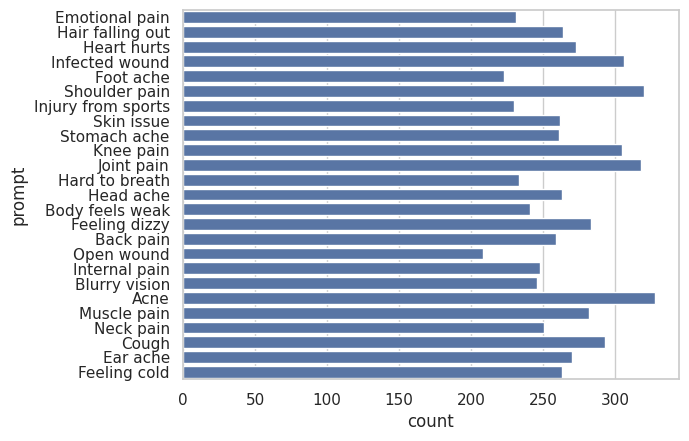

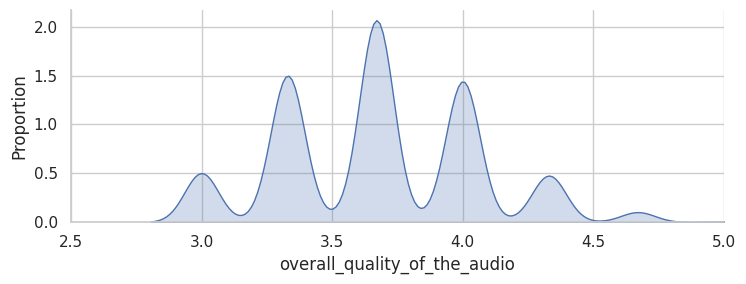

In [ ]:
sns.set_style("whitegrid")
promptsPlot = sns.countplot(y='prompt',data=overview)
promptsPlot

qualityPlot = sns.FacetGrid(overview,aspect=2.5)
qualityPlot.map(sns.kdeplot,'overall_quality_of_the_audio',shade= True)
qualityPlot.set(xlim=(2.5, overview['overall_quality_of_the_audio'].max()))
qualityPlot.set_axis_labels('overall_quality_of_the_audio', 'Proportion')
qualityPlot

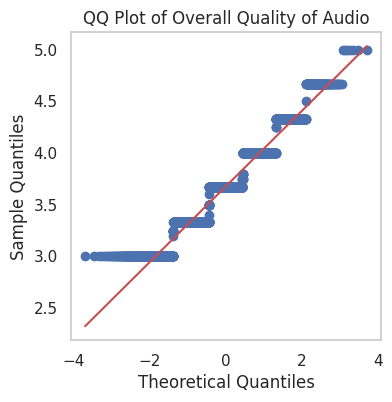

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# QQ Plot
plt.figure(figsize=(4, 4))
stats.probplot(overview['overall_quality_of_the_audio'], dist="norm", plot=plt)
plt.title('QQ Plot of Overall Quality of Audio')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()


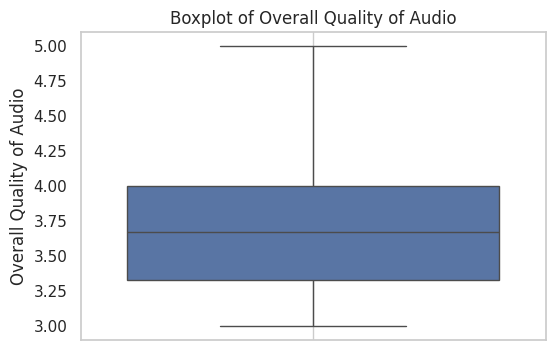

In [ ]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(y='overall_quality_of_the_audio', data=overview)
plt.title('Boxplot of Overall Quality of Audio')
plt.ylabel('Overall Quality of Audio')
plt.grid()
plt.show()


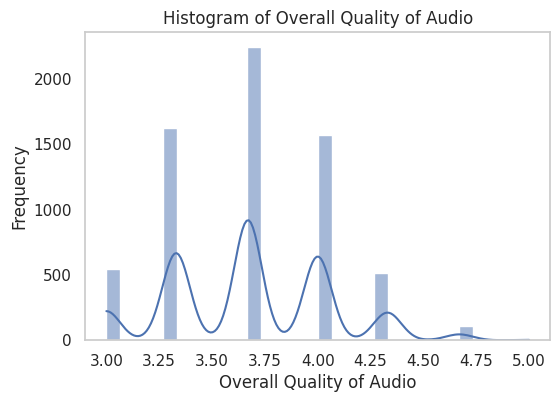

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(overview['overall_quality_of_the_audio'], bins=30, kde=True)
plt.title('Histogram of Overall Quality of Audio')
plt.xlabel('Overall Quality of Audio')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [ ]:
overview[62:63]

,file_name,phrase,prompt,overall_quality_of_the_audio,speaker_id
62,1249120_20518958_23074828.wav,I cut my hand a couple of weeks ago and even t...,Infected wound,4.0,20518958


In [ ]:
IPython.display.Audio('/content/drive/MyDrive/test/medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_20518958_23074828.wav')

In [ ]:
overview[118:119]

,file_name,phrase,prompt,overall_quality_of_the_audio,speaker_id
118,1249120_43788827_53247832.wav,Every time I take a deep breath I start coughing,Cough,3.33,43788827


In [ ]:
import nltk

# Download the stopwords dataset
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

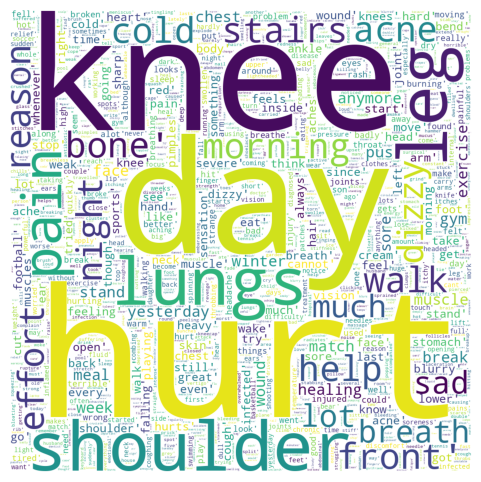

In [ ]:
plt.figure(figsize=(6,6))
wordCloudFunction(overview,'phrase',10000000)

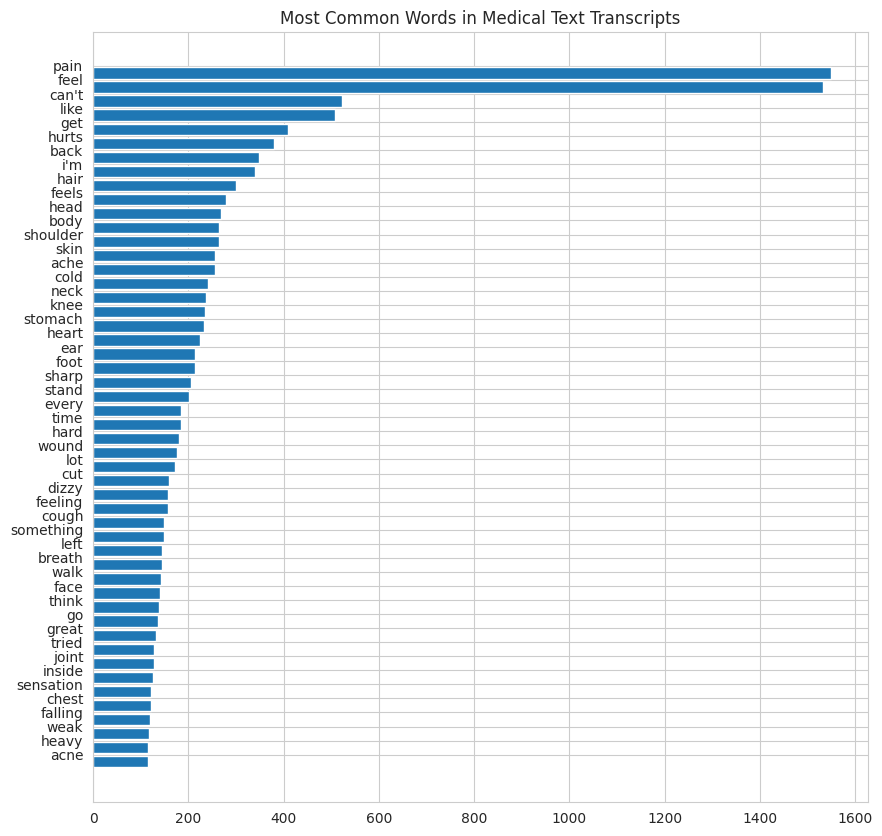

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(overview,'phrase',"Most Common Words in Medical Text Transcripts")

In [ ]:
from pathlib import Path


In [ ]:
pip install fastai

In [ ]:
!pip install fastai --upgrade


In [ ]:
from fastai.text import *
from fastai.vision import *

In [ ]:
!pip install fastai --upgrade

In [ ]:
# Import necessary libraries
from fastai.text import *
import numpy as np
from pathlib import Path

# Set random seed
np.random.seed(7)

# Define the path to your data
path = Path('/content/drive/MyDrive/test/Medical Speech, Transcription, and Intent/')

# Load data using the newer DataBlock API
data_clas = TextDataLoaders.from_csv(path, 'overview-of-recordings.csv',
                                      cols='phrase',
                                      label_col='prompt',
                                      valid_pct=0.2,
                                      bs=42)

# Set model path
MODEL_PATH = "/tmp/model/"

# Create a text classifier learner
learn = text_classifier_learner(data_clas, model_dir=MODEL_PATH, arch=AWD_LSTM)

# Fit the model
learn.fit_one_cycle(5)


epoch,train_loss,valid_loss,time
0,3.383707,3.258095,00:48
1,3.336689,3.250457,00:36
2,3.286602,3.236393,00:35
3,3.275503,3.238400,00:35
4,3.269719,3.237586,00:36


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,3.266470,3.247044,01:36
1,3.256703,3.212175,01:33
2,3.249930,3.226329,01:35
3,3.244067,3.215909,01:33
4,3.234175,3.216404,01:32


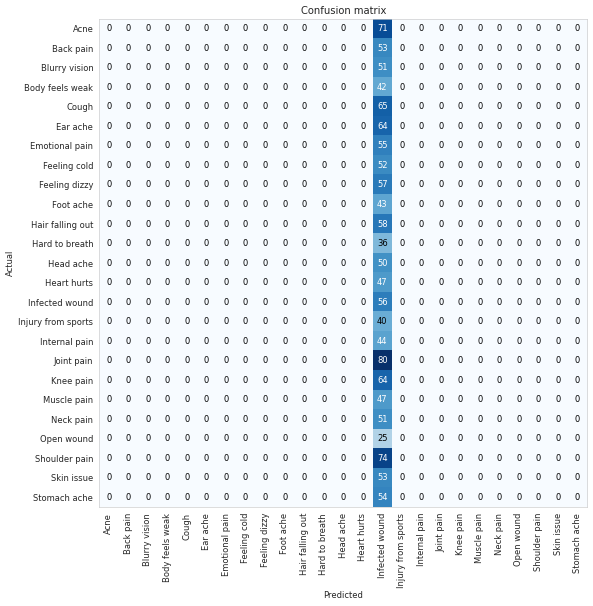

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

**Part 3 of 3: Classify Ailment from Audio Description**



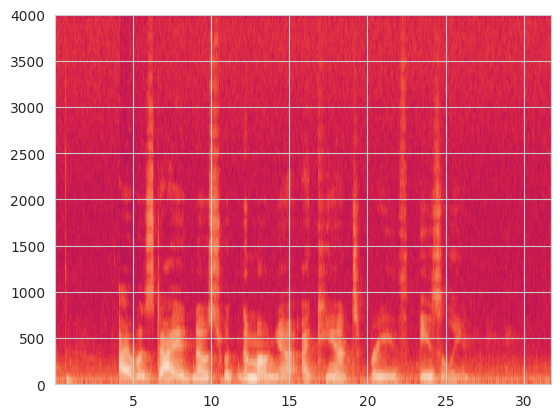

In [ ]:
testAudio = "/content/drive/MyDrive/test/Medical Speech, Transcription, and Intent/recordings/train/1249120_44176037_58635902.wav"
x = create_spectrogram(testAudio)

**Mel-frequency_cepstrum Application.**



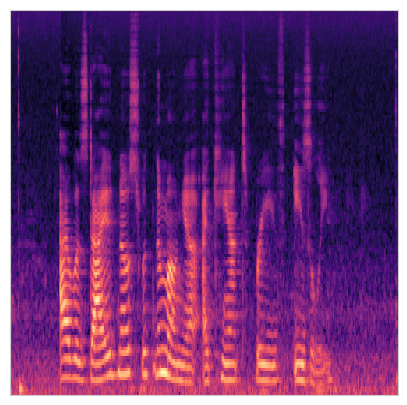

In [ ]:
filename = "/content/drive/MyDrive/test/Medical Speech, Transcription, and Intent/recordings/train/1249120_44176037_58635902.wav"
clip, sample_rate = librosa.load(filename, sr=None)
fig = plt.figure(figsize=[5,5])
S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

In [ ]:
from glob import glob

In [ ]:
!cat /etc/issue


Ubuntu 22.04.3 LTS \n \l



In [ ]:
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestClassifier  # Choose an appropriate model
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to create mel spectrograms (Assuming you have this defined)
def create_melspectrogram(filename, name):
    # Load the audio file
    y, sr = librosa.load(filename)
    # Create a mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Flatten the mel spectrogram for feature extraction
    return mel_spectrogram_db.flatten()  # Flatten for later use

# Define directories
data_dir_train = np.array(glob("/content/drive/MyDrive/test/Medical Speech, Transcription, and Intent/recordings/train/*"))
data_dir_test = np.array(glob("/content/drive/MyDrive/test/Medical Speech, Transcription, and Intent/recordings/test/*"))
data_dir_val = np.array(glob("/content/drive/MyDrive/test/Medical Speech, Transcription, and Intent/recordings/validate/*"))

# Create mel spectrograms and extract features
features = []
labels = []  # Add corresponding labels based on your dataset

for file in tqdm(data_dir_train):
    filename, name = file, file.split('/')[-1].split('.')[0]
    mel_features = create_melspectrogram(filename, name)
    features.append(mel_features)
    labels.append('your_label_here')  # Replace with the actual label for each file

# Repeat for test and validation sets if necessary

# Prepare your data into a DataFrame
df = pd.DataFrame(features)
df['label'] = labels

# Check the shape of the DataFrame
print("DataFrame shape:", df.shape)

# Ensure there are features and labels before proceeding
if df.empty or df['label'].isnull().all():
    raise ValueError("No data available for training. Check your feature extraction process.")

# Split the dataset into features and target
X = df.drop('label', axis=1)
y = df['label']

# Check if there are enough samples
if len(X) == 0 or len(y) == 0:
    raise ValueError("Feature or target variable is empty.")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate and print MAE, MSE, RMSE
# Convert predictions to numerical values for error metrics calculation
# If your labels are categorical, you can map them to numerical values
# For this example, we'll assume binary labels; adjust accordingly for your use case.
y_test_numeric = pd.factorize(y_test)[0]  # Convert to numerical
y_pred_numeric = pd.factorize(y_pred)[0]  # Convert to numerical

mae = mean_absolute_error(y_test_numeric, y_pred_numeric)
mse = mean_squared_error(y_test_numeric, y_pred_numeric)
rmse = np.sqrt(mse)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


100%|██████████| 381/381 [00:20<00:00, 18.48it/s]


DataFrame shape: (381, 90369)
Classification Report:
                  precision    recall  f1-score   support

your_label_here       1.00      1.00      1.00        77

       accuracy                           1.00        77
      macro avg       1.00      1.00      1.00        77
   weighted avg       1.00      1.00      1.00        77

Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
